In [129]:
# Dependencies
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from pathlib import Path

In [130]:
# Copy the file path to reading 

file = Path(r'Source\adult.csv')

In [131]:
# Reading the CSV file in to the Pandas DataFrame 
df = pd.read_csv(file)
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [132]:
# df.columns

In [133]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [134]:
# Checking for the missing values 
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [135]:
# # Identify the duplicate values 
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [136]:
duplicate = df.drop_duplicates(inplace=True)
print(duplicate)

None


In [137]:
# Drop all rows with missing information
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [138]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [139]:
# df=pd.get_dummies(columns=['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
#        'hours.per.week', 'income', 'workclass_Federal-gov',
#        'workclass_Local-gov', 'workclass_Private',
#        'native.country_Portugal', 'native.country_Puerto-Rico',
#        'native.country_Scotland', 'native.country_South',
#        'native.country_Taiwan', 'native.country_Thailand',
#        'native.country_Trinadad&Tobago', 'native.country_United-States',
#        'native.country_Vietnam', 'native.country_Yugoslavia'] ,data=df)




In [140]:
# data = df
# data

In [141]:
# Verify dropped rows
df.count()

age               30139
workclass         30139
fnlwgt            30139
education         30139
education.num     30139
marital.status    30139
occupation        30139
relationship      30139
race              30139
sex               30139
capital.gain      30139
capital.loss      30139
hours.per.week    30139
native.country    30139
income            30139
dtype: int64

# for the data modeling 

We will doing the Algorithms such as:

logistic regression

decision trees

random forests

neural networks 

predictive modeling and classification

In [142]:
# Importing the libraries for data modeling 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [143]:
# # Recognizing the numerical and categorical columns in dataset 

# numirical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
# print(numirical_cols )

# categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
# print(categorical_cols)

In [144]:
# identfing the numerical and categorical colums in dataset 

numeric_cols = df.select_dtypes(include=[np.number])
categorical_cols = df.select_dtypes(exclude=[np.number])

# print(numeric_cols)
print(categorical_cols)


      workclass     education      marital.status         occupation  \
1       Private       HS-grad             Widowed    Exec-managerial   
3       Private       7th-8th            Divorced  Machine-op-inspct   
4       Private  Some-college           Separated     Prof-specialty   
5       Private       HS-grad            Divorced      Other-service   
6       Private          10th           Separated       Adm-clerical   
...         ...           ...                 ...                ...   
32556   Private  Some-college       Never-married    Protective-serv   
32557   Private    Assoc-acdm  Married-civ-spouse       Tech-support   
32558   Private       HS-grad  Married-civ-spouse  Machine-op-inspct   
32559   Private       HS-grad             Widowed       Adm-clerical   
32560   Private       HS-grad       Never-married       Adm-clerical   

        relationship   race     sex native.country income  
1      Not-in-family  White  Female  United-States  <=50K  
3          Unma

# Waht is heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

The color of each cell represents the strength and direction of the correlation, with darker colors indicating stronger correlations.

The relationship between two variables is generally considered strong when their r value is larger than 0.7

r is a value between [-1,1]

<Axes: >

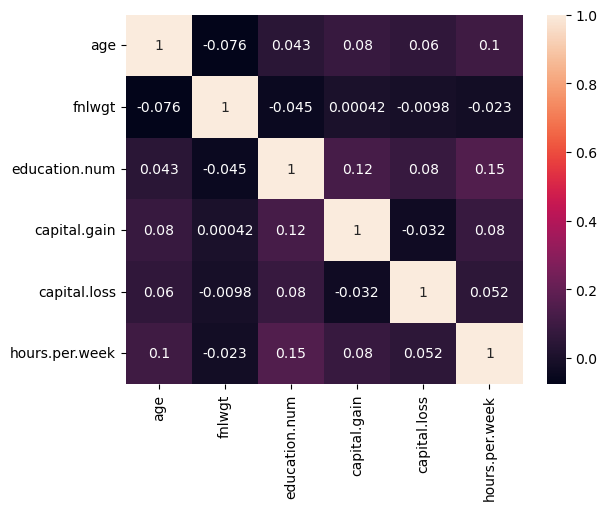

In [145]:
# Ploting a heatmap for understndin relationship between two varaibles 

sns.heatmap(data=numeric_cols.corr(),annot=True)

# Why do we use piplline 
Doing the pipeline include things like organizing your data, training models, and deploying them to make predictions. Pipelining is important because it helps you organize your machine learning workflows and makes your process faster. By linking different steps together, you can save time and effort.

# ML Pipline 
Organize Data

Train the model 

Evalute the model 

Deploy the model 

In [146]:
# Preprocessing for numerical columns 

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [147]:
# Preprocessing for categorical columns
 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [148]:
# combining the preprossing steps 
preprocessore = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer , numeric_cols),
        ('cat', categorical_transformer, categorical_cols),     
    ])
preprocessore

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                        age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week
1       82  132870              9             0          4356              18
3       54  140359              4             0          3900              40
4       41  264663             10             0          3900              40
5       34  216864              9             0          3770              45
6       38  150601              6             0          3770              40
...    ...     ...            ...           ...           ...             ...
32556   22  310152             10             0             0              40
32557   27  257302             12             0             0              38
32558   40  154374              9             0...
4          Own-child  White  Female  United-States  <=50K  
5          Unmarried  White  Female  United-States  <=50K  
6          Unmarried  White    Male  United-States  <=50K  
...              ...    ...     ...            ...    ...  
32556  Not-in-family  White    Male  United-States  <=50K  
32557           Wife  White  Female  United-States  <=50K  
32558        Husband  White    Male  United-States   >50K  
32559      Unmarried  White  Female  United-States  <=50K  
32560      Own-child  White    Male  United-States  <=50K  

[30139 rows x 9 columns])])

In [149]:
# Spliting the data in to training and testing 
X = df. drop('income' , axis = 1)
Y =  df ['income']
X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [150]:
# Encode the target variable
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

label_encoder

LabelEncoder()

Target encoding works by converting each category of a categorical feature into its corresponding expected value. The approach to calculating the expected value will depend on the value you are trying to predict. For Regression problems, the expected value is simply the average value for that category.

The reason for encoding is that most machine learning algorithms work with numbers and not with text or categorical variables

c:\Users\bakts\OneDrive\Desktop\images-ML.png

# Waht is target variable?
A target variable is the variable or metric you're trying to predict with a supervised machine learning model. It is also often called the dependent variable, the response variable, the 'y' variable, or even simply the model output

In [151]:
# Defining the model
model = Pipeline(steps=[
    ('preprocessor', preprocessore),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

model 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                         age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week
1       82  132870              9             0          4356              18
3       54  140359              4             0          3900              40
4       41  264663             10             0          3900              40
5       34  216864              9             0          3770              45
6       38  150601              6             0          3770              40
...    ...     ...            ...           ...           ...             ...
32556   22  310152             10             0             0              40
32...
5          Unmarried  White  Female  United-States  <=50K  
6          Unmarried  White    Male  United-States  <=50K  
...              ...    ...     ...            ...    ...  
32556  Not-in-family  White    Male  United-States  <=50K  
32557           Wife  White  Female  United-States  <=50K  
32558        Husband  White    Male  United-States   >50K  
32559      Unmarried  White  Female  United-States  <=50K  
32560      Own-child  White    Male  United-States  <=50K  

[30139 rows x 9 columns])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [152]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [153]:
df=pd.get_dummies(columns=['workclass_Local-gov','education.num','marital.status','occupation','relationship','race','sex','native.country'],data=df)
data = df

KeyError: "['workclass_Local-gov'] not in index"

In [ ]:
# Train the model
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# # Display results
# print(f'Accuracy: {accuracy}')
# print('Classification Report:')
# print(report)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [ ]:
# Extract feature importances from the Random Forest model
importances = model.named_steps['classifier'].feature_importances_
feature_names = numeric_cols + list(model.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_cols))
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the feature importances by descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(10)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the sorted feature importances
print(feature_importances.head(10))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# # Clean up Employer category. Replace 'SELF' and 'SELF EMPLOYED' with 'SELF-EMPLOYED'
# df['Employer'] = df['Employer'].replace({'SELF': 'SELF-EMPLOYED', 'SELF EMPLOYED': 'SELF-EMPLOYED'})

In [ ]:
# # Verify clean-up.
# df['Employer'].value_counts()

In [ ]:
# # Clean up Employer category. Replace 'NOT EMPLOYED' with 'UNEMPLOYED'
# df['Employer'] = df['Employer'].replace({'NOT EMPLOYED': 'UNEMPLOYED'})
# df['Employer'].value_counts()

In [ ]:
# # Display a statistical overview
# # We can infer the maximum allowable individual contribution from 'max'
# df.describe()

In [ ]:
# # Save the DataFrame to a CSV file. 
# df.to_csv("Resources/donors2021.csv", index=False, encoding="ISO-8859-1")